## 17.7 Traversing a graph

Several algorithms on rooted trees, e.g. to compute a tree's height or
to evaluate an infix expression represented as a tree, are based on
[traversing the tree](../16_Trees/16_3_traversals.ipynb#16.3-Traversals), either in breadth or in depth.
Likewise, several graph algorithms are based on traversing the graph,
visiting each node once. A graph has no designated root node,
so a traversal algorithm takes as input the graph and a start node.

### 17.7.1 First algorithm

We can traverse a graph by following
the outgoing edges of previously visited nodes in order to visit further nodes.
We can only visit those nodes reachable from the start node.
In a graph there may be multiple paths from the start node to any other node.
To avoid visiting a node twice, we track which nodes we have visited.

We keep two sets of nodes: those already visited and
those still unprocessed. Initially, the start node has been visited and
its out-neighbours are unprocessed.
While there are nodes to be processed, we pick one of them and
check if it was already visited. If not, we visit the node and
add its out-neighbours to the unprocessed nodes.

Here's the algorithm, with inputs *graph* and *start*,
which is a node of *graph*.

1. let *visited* be {*start*}
1. let *unprocessed* be the out-neighbours of *start* in *graph*
3. while *unprocessed* isn't empty:
   1. remove one *node* from *unprocessed*
   2. if *node* not in *visited*:
      1. visit *node*
      2. add *node* to *visited*
      3. for each *neighbour* in out-neighbours of *node* in *graph*:
         1. add *neighbour* to *unprocessed*

What we do when visiting a node (step&nbsp;3.2.1) depends on the problem at hand.

Step&nbsp;3.2 ensures two things: each node is visited at most once and
only the out-neighbours of unvisited nodes are marked for processing later.
Eventually the traversal has visited all nodes it can reach from the start node.
From then on, the loop keeps processing nodes, but they've all been visited and
so no further nodes are added for processing. At some point,
the set of unprocessed nodes becomes empty and the algorithm stops.

### 17.7.2 Complexity

Let's analyse the complexity of the traversal itself, ignoring step&nbsp;3.2.1.

What's a best-case scenario and the corresponding complexity?

___

The algorithm does the least work if it only visits the start node and
doesn't enter the loop, i.e. *unprocessed* is empty.
This happens if the start node has no neighbours.
In such a best-case scenario, steps 1 and 2 take constant time.

The algorithm does the most work when all nodes are reachable from
the start node. In a worst-case scenario, it visits all *n* nodes.

It's sometimes easier to analyse an algorithm if we look at the overall
complexity of each non-loop statement, instead of looking at the complexity of
a single execution and then multiplying by the number of iterations.

Here's the algorithm again, annotated with the total worst-case complexity of
each step, except for loops and for visiting nodes.

1. Θ(1) let *visited* be {*start*}
1. Θ(out-degree(*start*)) let *unprocessed* be the out-neighbours of *start* in *graph*
3. while *unprocessed* isn't empty:
   1. Θ(*e*) remove one *node* from *unprocessed*
   2. Θ(*e*) if *node* not in *visited*:
      1. visit *node*
      2. Θ(*n*) add *node* to *visited*
      3. for each *neighbour* in out-neighbours of *node* in *graph*:
         1. Θ(*e*) add *neighbour* to *unprocessed*

The initialisation assignments are done only once.

Because of step&nbsp;3.2, each node is visited once,
so step&nbsp;3.2.2 is executed *n* times in total.

Step&nbsp;3.2.3 goes through every out-neighbour of each visited node and
all nodes are visited in a worst-case scenario,
so the algorithm goes through all edges. In other words, every edge is
added to set *unprocessed* in step&nbsp;3.2.3.1 and later removed in step&nbsp;3.1.
The while-loop is executed *e* times and so is step&nbsp;3.2.

All operations on sets take constant time, so the worst-case complexity is

Θ(1) + Θ(out-degree(*start*)) + Θ(*n*) + 3×Θ(*e*) = Θ(*n* + *e*).

As usual, we ignore constant factors and the faster operations:
the out-degree of *start* is never more than the total number of edges,
so Θ(out-degree(*start*)) + Θ(*n*) = Θ(*n*).

Most graphs have more edges than nodes, so Θ(*n* + *e*) = Θ(*e*) for them.
But some graphs have more nodes than edges, so Θ(*n* + *e*) = Θ(*n*) for them.
We could therefore say that the worst-case complexity of traversing a graph is
Θ(*n*) if it has more nodes than edges, otherwise it is Θ(*e*).

The densest graphs have *n* × (*n* – 1) edges, so
Θ(*n* + *e*) = Θ(*n*) + O(*n*²) = O(*n*²) for any graph.
Once we replace a graph's exact number of edges *e* with an upper bound
(the maximal number of edges), we must use
[Big-Oh](../13_Divide/13_3_variable_decrease.ipynb#13.3.3-Complexity) instead of Big-Theta notation.

In summary, we can give the complexity of graph algorithms in terms of
just the number of edges or just the number of nodes, but
it's simpler, more general and more precise to state it in terms of both.

<div class="alert alert-warning">
<strong>Note:</strong> State the complexity of graph algorithms in terms of the number of nodes <em>n</em>
and the number of edges <em>e</em>.
</div>

### 17.7.3 Code and tests

Let's implement and test the algorithm.
I must first load both graph classes and the special graphs.

In [1]:
%run -i ../m269_digraph
%run -i ../m269_ungraph
%run -i ../m269_graphs

Instead of a set, I keep the visited nodes in a sequence and return it,
to see in which order the nodes were visited.

In [2]:
def traversal(graph: DiGraph, start: Hashable) -> list:
    """Return all nodes reachable from start, in the order visited.

    Preconditions: graph.has_node(start)
    """
    visited = [start]
    unprocessed = graph.out_neighbours(start)
    while len(unprocessed) > 0:
        node = unprocessed.pop()
        if node not in visited:
            visited.append(node)
            for neighbour in graph.out_neighbours(node):
                unprocessed.add(neighbour)
    return visited

In [3]:
traversal(null_graph(3), 0)  # null graph with several nodes

[0]

In [4]:
traversal(path_graph(4), 1)  # start from node 1

[1, 0, 2, 3]

In [5]:
traversal(complete_graph(4), 0)

[0, 1, 2, 3]

As you can check, only the reachable nodes are visited and they're visited once,
even if there are multiple paths from the start node to it.

#### Exercise 17.7.1

[Outline](../06_Implementing/06_4_bounded.ipynb#6.4.1-Outlining-algorithms) an algorithm that
does a traversal to decide if a given non-empty undirected graph is connected.

_Write your answer here._

[Hint](../31_Hints/Hints_17_7_01.ipynb)
[Answer](../32_Answers/Answers_17_7_01.ipynb)

### 17.7.4 Second algorithm

In a rooted tree, there's a single path from the root to each node.
A traversal of a rooted tree can simply return a sequence of visited nodes,
like the algorithm above, because we know exactly how each node was reached:
via the edge from its parent.

But for graphs in general, a node may be reached in several ways,
via any of its neighbours. It may be more useful to return the actually
traversed **subgraph**, i.e. the subset of nodes visited and edges followed.

The next algorithm is a modification of the first so that we can see
how a graph is traversed. Instead of marking out-neighbours to be processed,
I mark the outgoing edges. When picking the next edge to process, I add it to
the subgraph, which initially has just the start node.

1. let *visited* be a digraph with node *start*
2. let *unprocessed* be the set of the outgoing edges from *start*
3. while *unprocessed* isn't empty:
   1. remove one edge (*previous*, *current*) from *unprocessed*
   2. if *visited* doesn't have node *current*:
      1. visit *current*
      2. add *current* to *visited*
      3. add (*previous*, *current*) to *visited*
      4. for each *neighbour* in out-neighbours of *current* in *graph*:
         1. add (*current*, *neighbour*) to *unprocessed*

Why does the if-statement not add node *previous* to graph *visited*?

___

An edge (A, B) is added to *unprocessed* by step&nbsp;2 or by step&nbsp;3.2.4.1.
Either step is preceded by adding A to the graph, in step&nbsp;1 or step&nbsp;3.2.2.
Hence, when removing (A, B) from *unprocessed*,
i.e. when following the edge from A to B, we only have to add B to the graph.

Changing the type of *visited* from a set to a digraph doesn't affect
the algorithm's complexity. Every step on *visited*
(adding a node, checking if it has a node) still takes constant time.
Keeping pairs of nodes in *unprocessed* instead of single nodes doesn't
change the complexity either.

The code is as follows.

In [6]:
def traversed(graph: DiGraph, start: Hashable) -> DiGraph:
    """Return the traversed subgraph when beginning at start.

    Preconditions: graph.has_node(start)
    """
    visited = DiGraph()
    visited.add_node(start)
    unprocessed = set()
    for neighbour in graph.out_neighbours(start):
        unprocessed.add((start, neighbour))
    while len(unprocessed) > 0:
        edge = unprocessed.pop()
        previous = edge[0]
        current = edge[1]
        if not visited.has_node(current):
            visited.add_node(current)
            visited.add_edge(previous, current)
            for neighbour in graph.out_neighbours(current):
                unprocessed.add((current, neighbour))
    return visited

Let's see the traversal in action, including with a random graph.

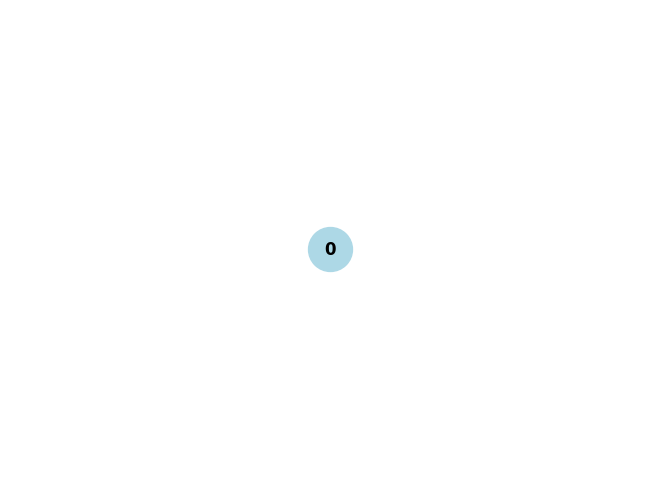

In [7]:
traversed(null_graph(3), 0).draw()  # null graph with several nodes

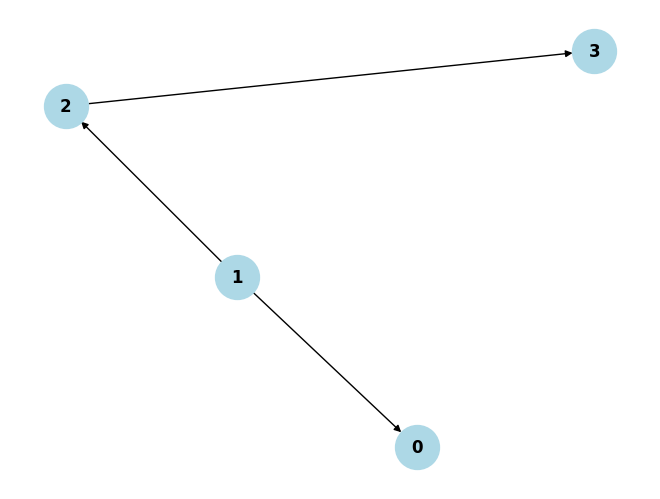

In [8]:
traversed(path_graph(4), 1).draw()  # start from node 1

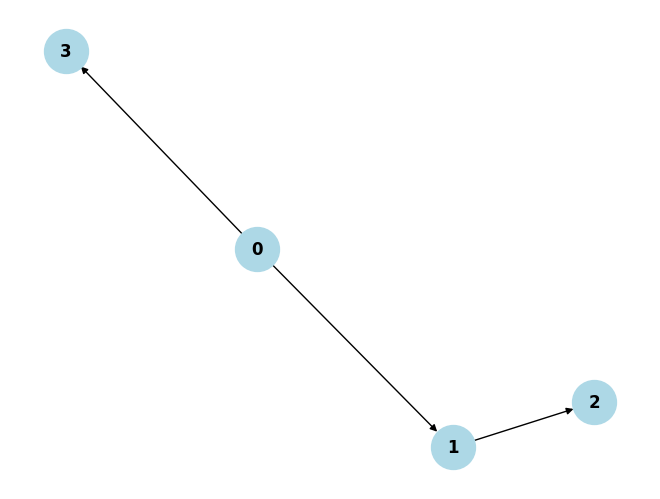

In [9]:
traversed(complete_graph(4), 0).draw()

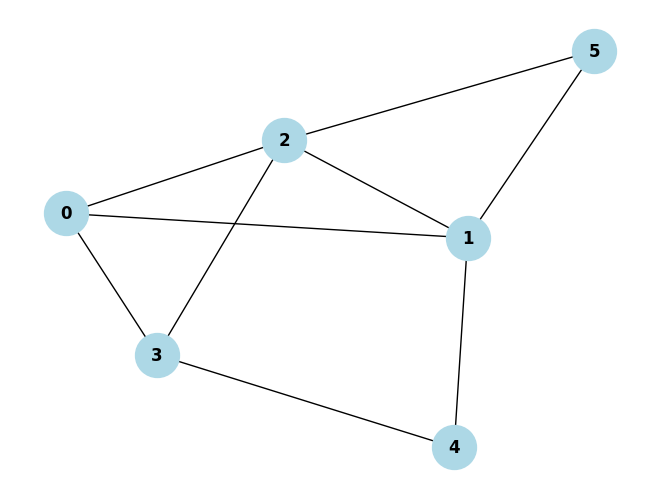

In [10]:
random = random_graph(6, 0.4)
random.draw()

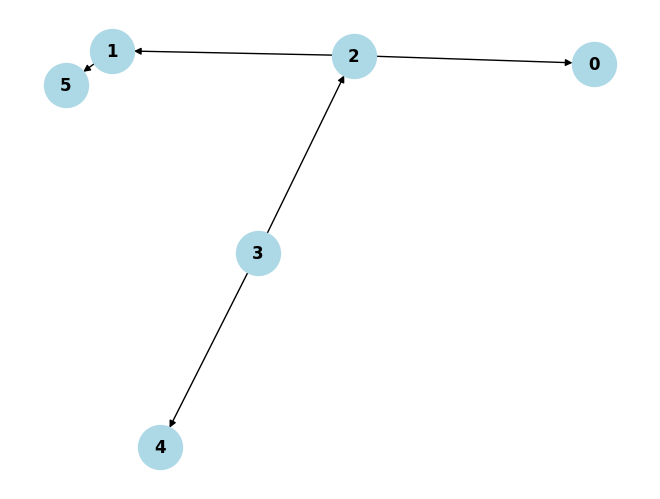

In [11]:
traversed(random, 3).draw()  # start from node 3

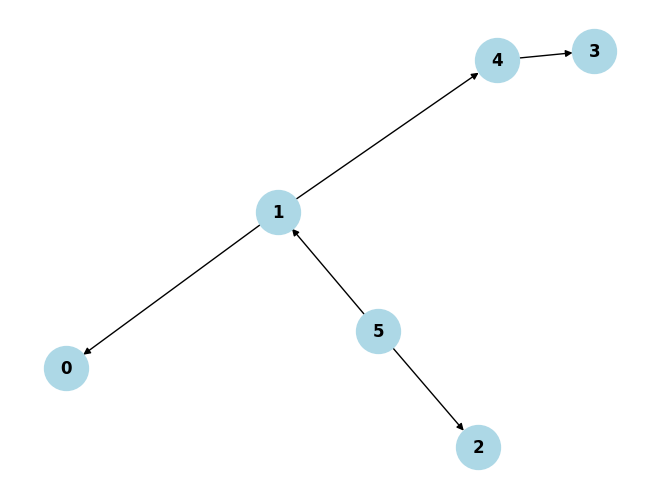

In [12]:
traversed(random, 5).draw()  # start from node 5

The generated digraph has one edge fewer than the number of nodes because for every node,
except the start, exactly one of its incoming edges is followed to visit it.
By construction, every node is reachable from the start node,
so the generated digraph is connected.
These two facts mean that there's a single path from the start node to
each other node. Hence there are no cycles: the generated graph is a DAG.
If we ignore edge directions, then we obtain a tree, rooted at the start node.

#### Exercise 17.7.2

Outline an algorithm that does a traversal to decide if
a given non-empty undirected graph is a tree.

_Write your answer here._

[Hint](../31_Hints/Hints_17_7_02.ipynb)
[Answer](../32_Answers/Answers_17_7_02.ipynb)

⟵ [Previous section](17_6_classes.ipynb) | [Up](17-introduction.ipynb) | [Next section](17_8_bfs_dfs.ipynb) ⟶